In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
import pandas as pd
import glob

In [3]:
data = pd.read_csv("/content/falldetectiondata.csv")

In [4]:
data.head(100)

,sl.no,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,class
0,1,-2.191344,1.836105,-0.723019,-0.232847,-0.688916,0.381181,0
1,2,-2.363008,1.904480,-1.155867,-0.057052,-0.607515,0.339946,0
2,3,-2.559274,1.177604,-1.169257,0.086240,0.302249,-0.259253,0
3,4,-2.081134,-1.058971,-0.112989,0.024963,0.770023,-0.537816,0
4,5,-2.415788,-2.580961,0.902503,0.011223,0.471664,-0.478298,0
...,...,...,...,...,...,...,...,...
95,96,-0.586537,-1.241410,-0.013780,-0.144614,-0.071649,0.003194,0
96,97,-0.614669,-0.940555,-0.100888,-0.189570,-0.165756,0.090802,0
97,98,-0.551498,0.184606,-0.212984,-0.236039,-0.342253,0.049127,0
98,99,-0.603691,0.839174,-0.290031,-0.055239,-0.411247,-0.145724,0


In [5]:
np.unique(data["class"])

array([0, 1])

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Conv1D, MaxPooling1D
from keras.utils import to_categorical

In [7]:
# Extract features (X) and labels (y)
X = data.iloc[:, 1:-1].values  # Assuming the features are in the first 23 columns
y = data.iloc[:, -1].values   # Assuming the labels are in the last column
print(y.shape,X.shape)

(7997,) (7997, 6)


In [8]:
# Standardize features

# Convert labels to one-hot encoding
y.shape

(7997,)

In [9]:
def create_baseline():
    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(6, 1)))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# Train the model

model = create_baseline()

hist = model.fit(X,y,epochs=10,validation_data=(X,y))

Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.2270 - accuracy: 0.9115 - val_loss: 0.0899 - val_accuracy: 0.9901
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.9919 - val_loss: 0.0457 - val_accuracy: 0.9919
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0402 - accuracy: 0.9932 - val_loss: 0.0356 - val_accuracy: 0.9947
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0326 - accuracy: 0.9952 - val_loss: 0.0292 - val_accuracy: 0.9954
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9952 - val_loss: 0.0250 - val_accuracy: 0.9961
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9952 - val_loss: 0.0225 - val_accuracy: 0.9960
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0213 - accuracy: 0.9964 - val_loss: 0.0197 - val_accuracy: 0.9964
Epoch 

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

y_pred = model.evaluate(X,y)

250/250 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9974


In [11]:
y_pred

[0.014840944670140743, 0.9973739981651306]

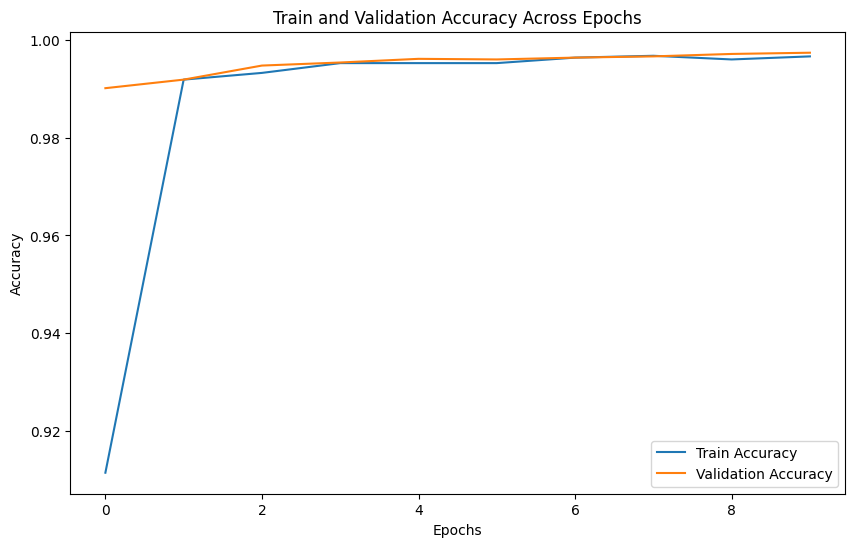

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# Plotting train and validation accuracy across epochs
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save("falldetection.h5")

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_quant_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_quant_model)

29940

In [15]:
from keras.models import load_model

model.save('Fall_Detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
